#  Analyse the quality of the PSF for target For Ronchi

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 23th  2021
- version v1.0

# Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [31]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

In [32]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [33]:
from datetime import datetime,date

In [34]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [35]:
string_date

'2021-04-23'

In [36]:
from iminuit import Minuit
import iminuit

In [37]:
iminuit.__version__

'2.2.0'

In [38]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [39]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [40]:
from time import sleep

In [41]:
from astropy.time import Time
import astropy.units as u

# Function

In [42]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [43]:
filename_logbook='logbooks/auxtellogbook_2021_ronchi_v1.1.csv'
filename_logbook_out='logbooks/auxtellogbook_2021_ronchi_v1.2.csv'

In [44]:
df=pd.read_csv(filename_logbook,index_col=0)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,2100.0,1750.0,NaN,NaN,skip,1.0,0.0
4,4,2021-03-12T01:52:28.549,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201...,201,HD75519,RG610,ronchi170lpmm,1.017474,5.0,...,11.6,49.0,0.3,2100.0,1750.0,NaN,NaN,skip,0.0,0.0
5,5,2021-03-12T01:52:38.095,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202...,202,HD75519,RG610,ronchi170lpmm,1.017430,5.0,...,11.6,49.0,0.3,2100.0,1750.0,NaN,NaN,skip,0.0,0.0
6,6,2021-03-12T01:52:47.124,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203...,203,HD75519,RG610,ronchi170lpmm,1.017389,5.0,...,11.6,49.0,0.3,2100.0,1750.0,NaN,NaN,skip,0.0,0.0
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,200.0,1700.0,NaN,NaN,,1.0,1.0
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,200.0,1700.0,NaN,NaN,,1.0,1.0
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,200.0,1700.0,NaN,NaN,,1.0,1.0


# Selection of input file


- the target coordinates 'Obj-posXpix','Obj-posYpix' must exists.

### Drop NA

In [47]:
df.dropna(how='any', subset=['Obj-posXpix','Obj-posYpix'],inplace=True)

## Drop bad quality

In [48]:
#i = df[(df.run != 1) | (df.quality != 1)].index
i = df[(df.run != 1) ].index

In [49]:
i

Int64Index([ 4,  5,  6, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 69,
            79],
           dtype='int64')

In [50]:
df.drop(i,inplace=True)

In [51]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,1800.0,2500.0,NaN,NaN,skip,1.0,0.0
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,2100.0,1750.0,NaN,NaN,skip,1.0,0.0
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,200.0,1700.0,NaN,NaN,,1.0,1.0
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,200.0,1700.0,NaN,NaN,,1.0,1.0
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,200.0,1700.0,NaN,NaN,,1.0,1.0
10,10,2021-03-12T02:01:25.066,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207...,207,HD75519,RG610,ronchi170lpmm,1.015663,5.0,...,11.8,50.0,0.5,200.0,1700.0,NaN,NaN,,1.0,1.0
11,11,2021-03-12T02:01:34.539,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208...,208,HD75519,RG610,ronchi170lpmm,1.015638,5.0,...,11.8,50.0,0.5,200.0,1700.0,NaN,NaN,,1.0,1.0
12,12,2021-03-12T02:01:43.667,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209...,209,HD75519,RG610,ronchi170lpmm,1.015614,5.0,...,11.8,50.0,0.5,200.0,1700.0,NaN,NaN,,1.0,1.0


In [52]:
myhome=os.getenv("HOME")
dir_images=os.path.join(myhome,"DATA/AuxTelData2021/ronchi170lpmm/FlipCleans")

In [53]:
disperser_label = "ronchi170lpmm"
config = "config/auxtel_quicklook.ini"

In [54]:
idx=0
for filename_image in df["file"]:
    
    fullfilename=os.path.join(dir_images,filename_image)
    X=df.iloc[idx]["Obj-posXpix"]
    Y=df.iloc[idx]["Obj-posYpix"]
    guess = [X,Y]
    target = file_target(filename_image)[0]
    print(filename_image," ",target," ",guess)
    idx+=1

Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits   HD75519   [1800.0, 2500.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits   HD75519   [1800.0, 2500.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits   HD75519   [1800.0, 2500.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits   HD75519   [2100.0, 1750.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits   HD75519   [200.0, 1700.0]
Cor_ronchi170lpmm_RG610_HD75519_2021

# Configuration of the running mode

In [55]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [56]:
FLAG_SHOW_SPECTRACTOR_IMAGES = False

In [57]:
if FLAG_SHOW_SPECTRACTOR_IMAGES:

    idx=0
    for filename_image in df["file"]:
    
        fullfilename=os.path.join(dir_images,filename_image)
        X=df.iloc[idx]["Obj-posXpix"]
        Y=df.iloc[idx]["Obj-posYpix"]
        guess = [int(X),int(Y)]
        target = file_target(filename_image)[0]
        print(idx,")  ",filename_image," ",target," ",guess)
    

        image=Image(file_name=fullfilename, target_label=target, disperser_label=disperser_label, config=config)
        image.plot_image(figsize=(12, 10),scale="log")
        idx+=1

0) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits HD75519


2021-04-23 12:17:17  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.363283812576087 but average of self.read_out_noise is 8.5.


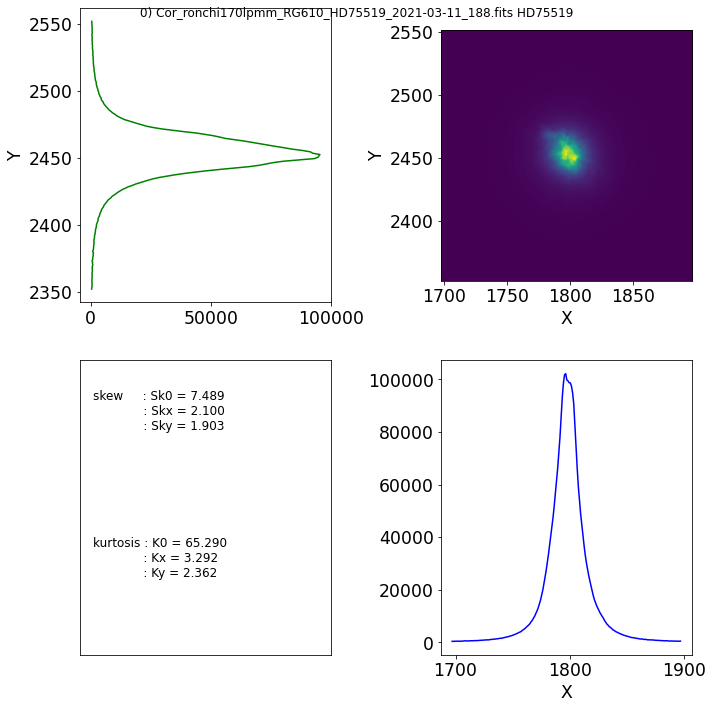

1) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits HD75519


2021-04-23 12:17:28  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.361855103278568 but average of self.read_out_noise is 8.5.


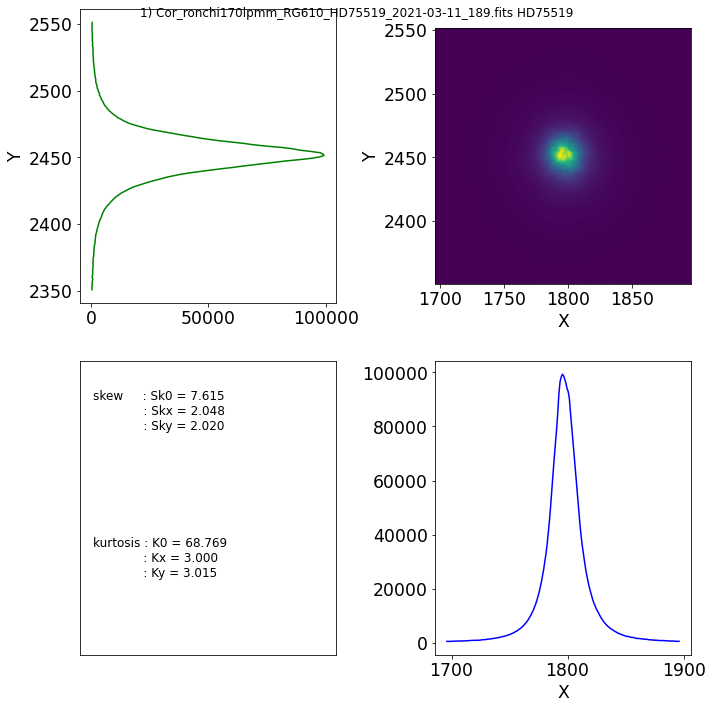

2) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits HD75519


2021-04-23 12:17:40  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.364087221080966 but average of self.read_out_noise is 8.5.


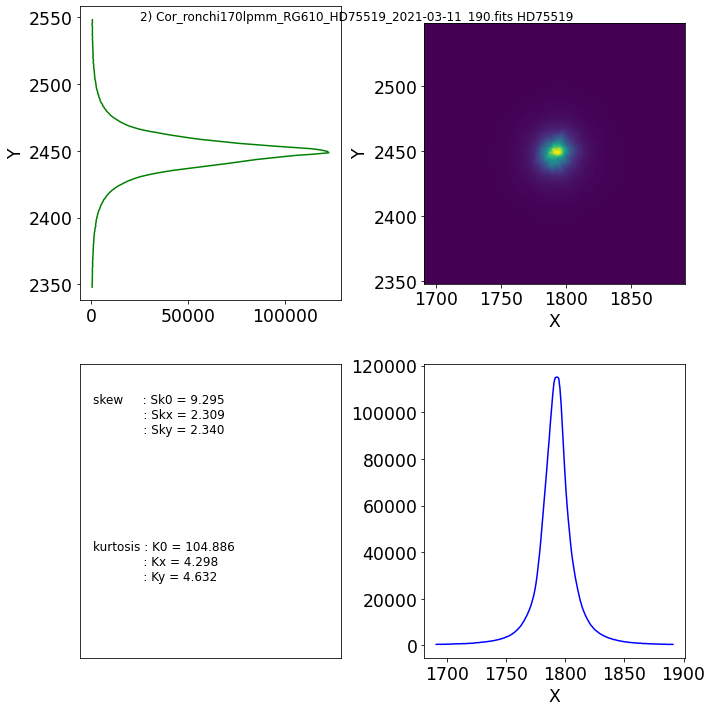

3) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits HD75519


2021-04-23 12:17:51  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.370810871034847 but average of self.read_out_noise is 8.5.


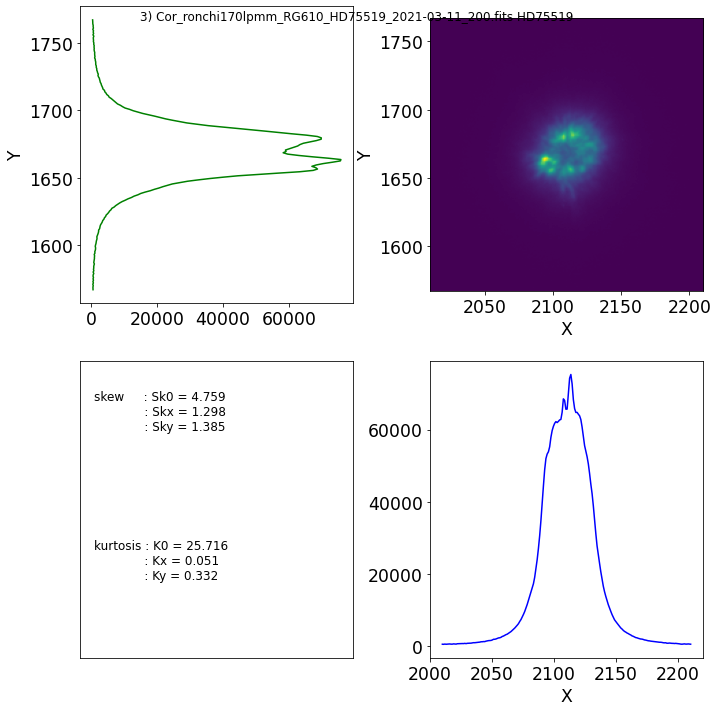

4) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits HD75519


2021-04-23 12:18:03  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.36971196115288 but average of self.read_out_noise is 8.5.


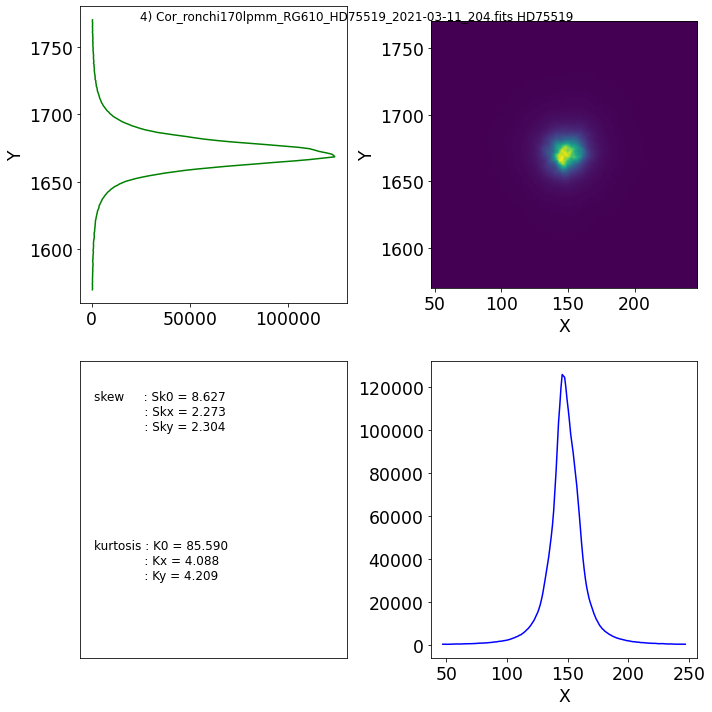

5) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits HD75519


2021-04-23 12:18:15  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.36801585600352 but average of self.read_out_noise is 8.5.


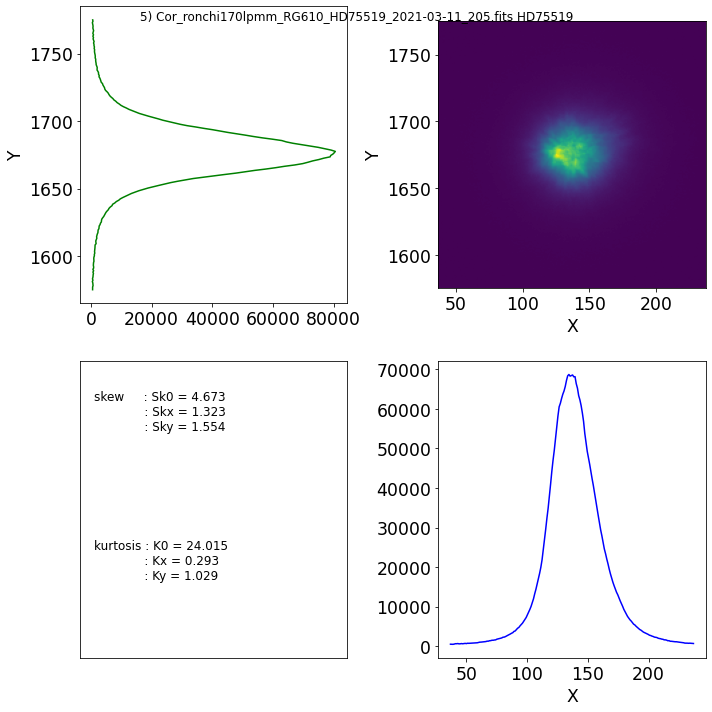

6) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits HD75519


2021-04-23 12:18:26  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.366923779291042 but average of self.read_out_noise is 8.5.


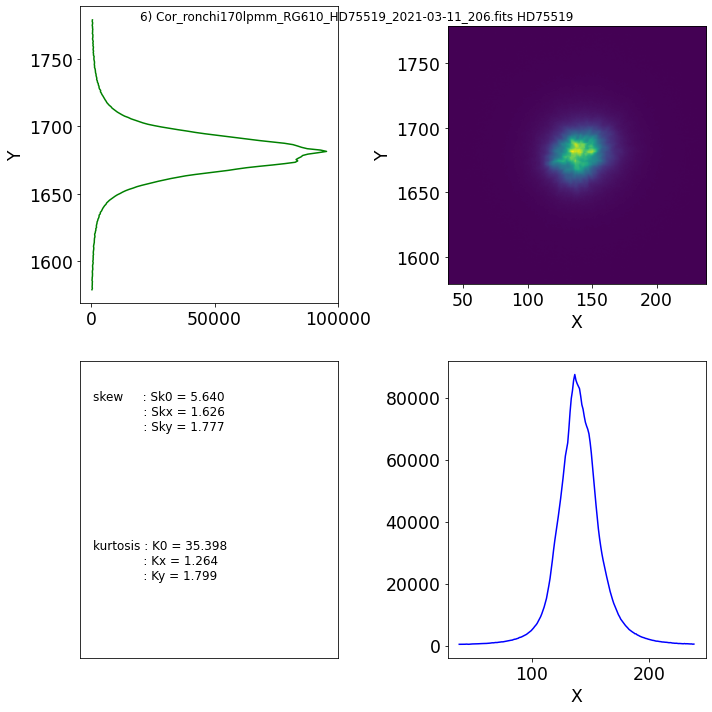

7) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits HD75519


2021-04-23 12:18:41  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.366478661702116 but average of self.read_out_noise is 8.5.


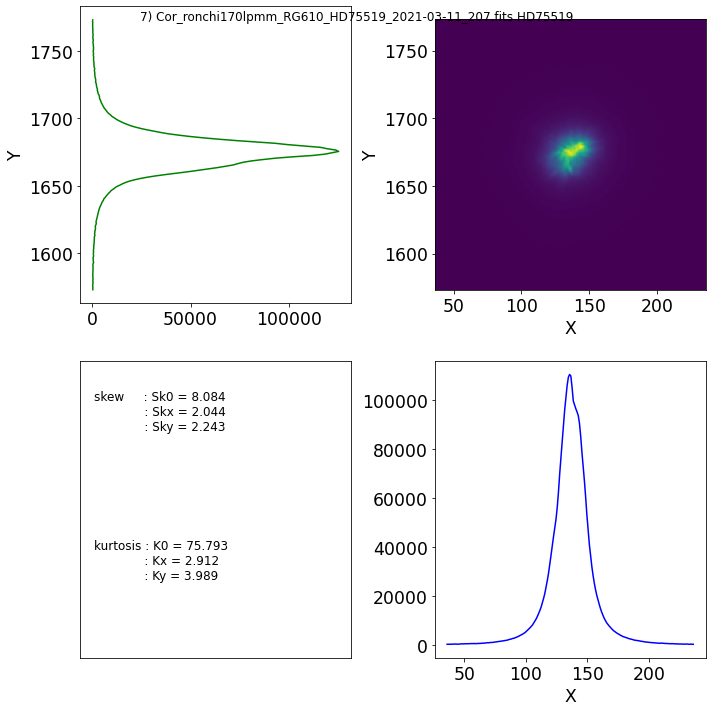

8) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_208.fits HD75519


2021-04-23 12:18:52  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.367942874786367 but average of self.read_out_noise is 8.5.


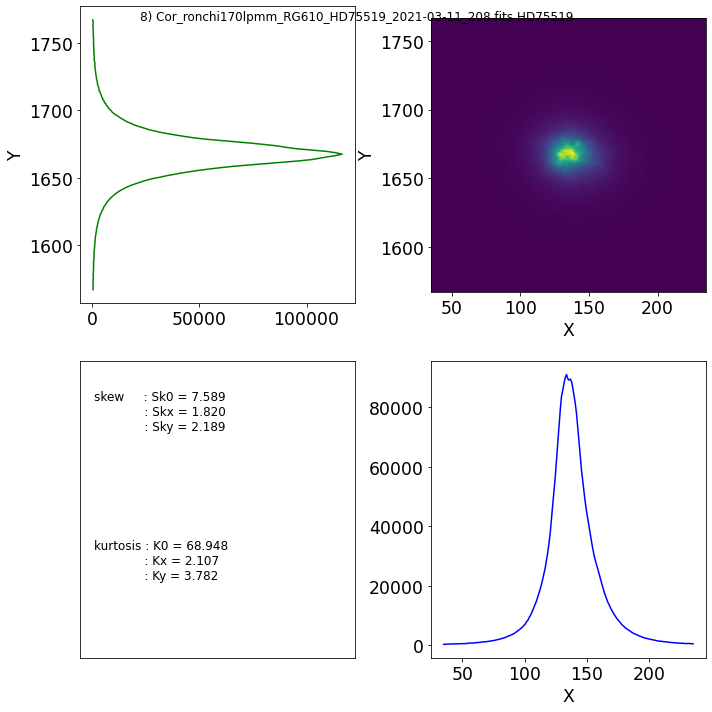

9) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_209.fits HD75519


2021-04-23 12:19:03  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.370031723498427 but average of self.read_out_noise is 8.5.


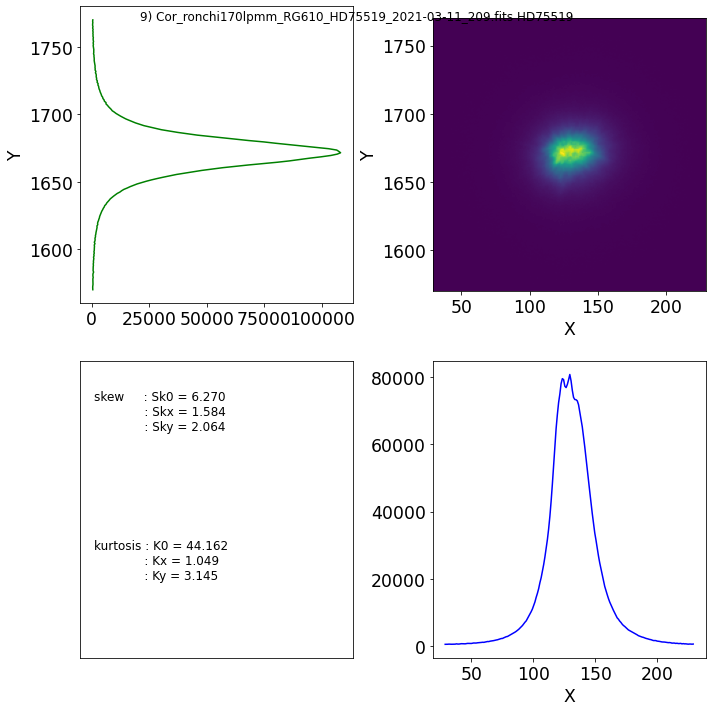

10) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_210.fits HD75519


2021-04-23 12:19:14  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.37028716252344 but average of self.read_out_noise is 8.5.


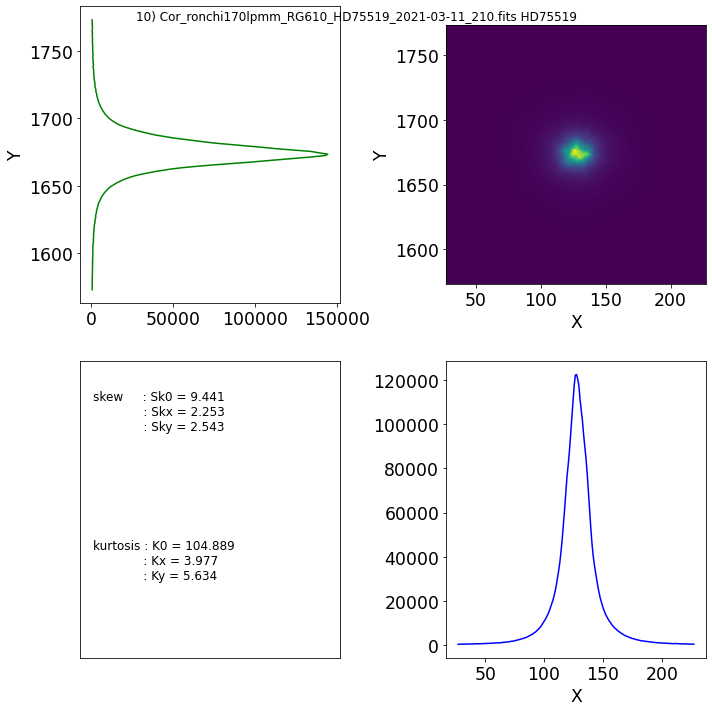

11) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_211.fits HD75519


2021-04-23 12:19:27  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.366643344566612 but average of self.read_out_noise is 8.5.


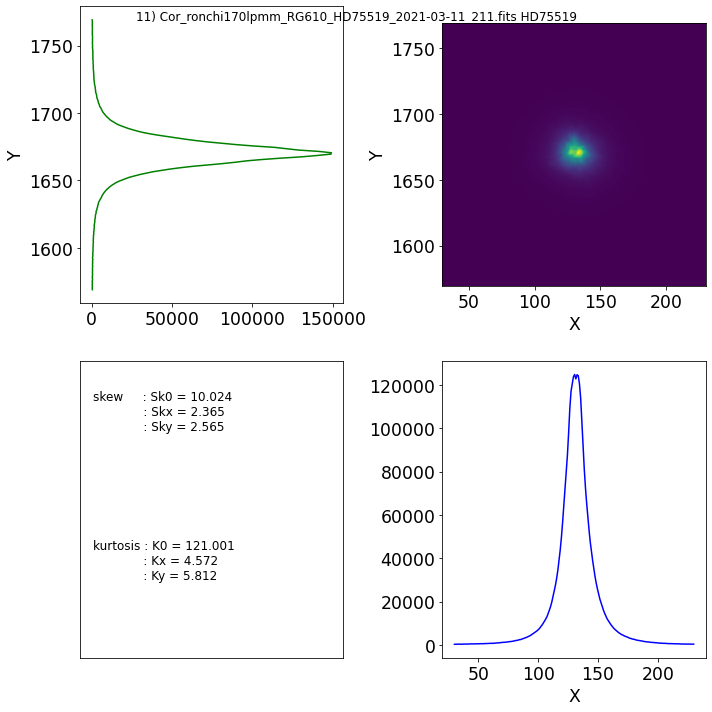

12) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_212.fits HD75519


2021-04-23 12:19:40  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.369469083709852 but average of self.read_out_noise is 8.5.


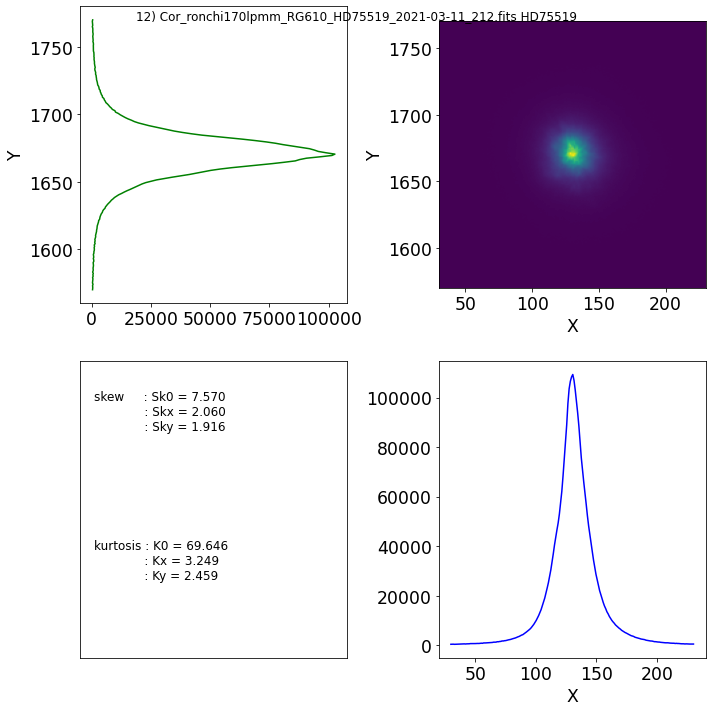

13) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_213.fits HD75519


2021-04-23 12:19:50  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.367648598776624 but average of self.read_out_noise is 8.5.


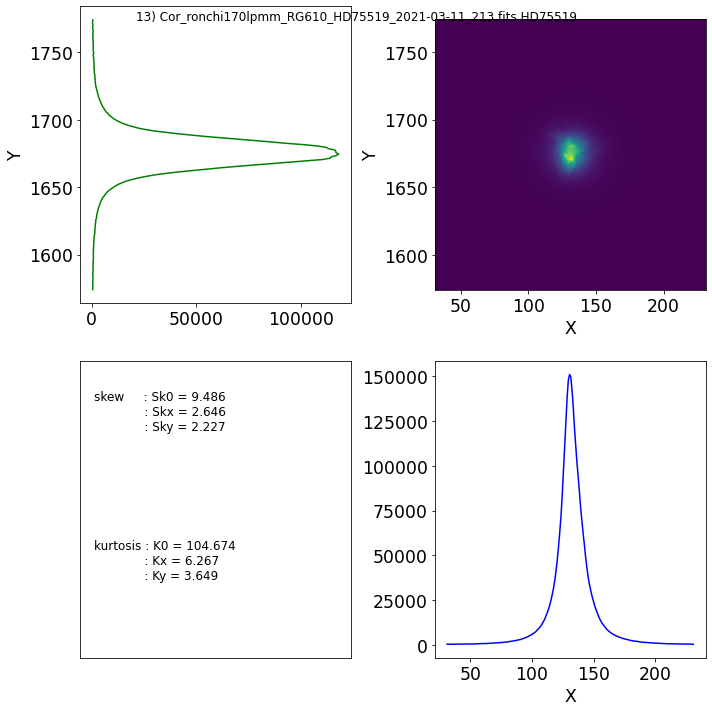

14) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_214.fits HD75519


2021-04-23 12:20:05  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.367892261900414 but average of self.read_out_noise is 8.5.


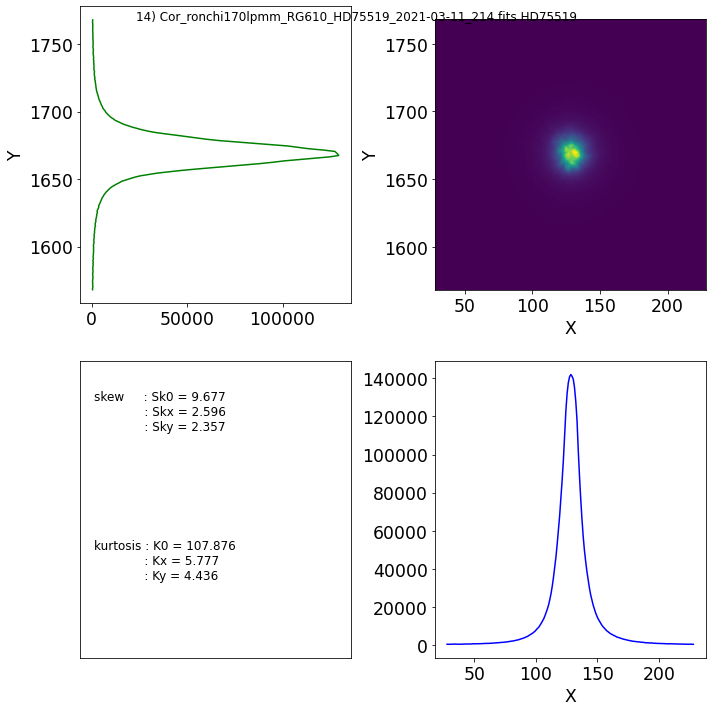

15) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_215.fits HD75519


2021-04-23 12:20:17  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.370484468198525 but average of self.read_out_noise is 8.5.


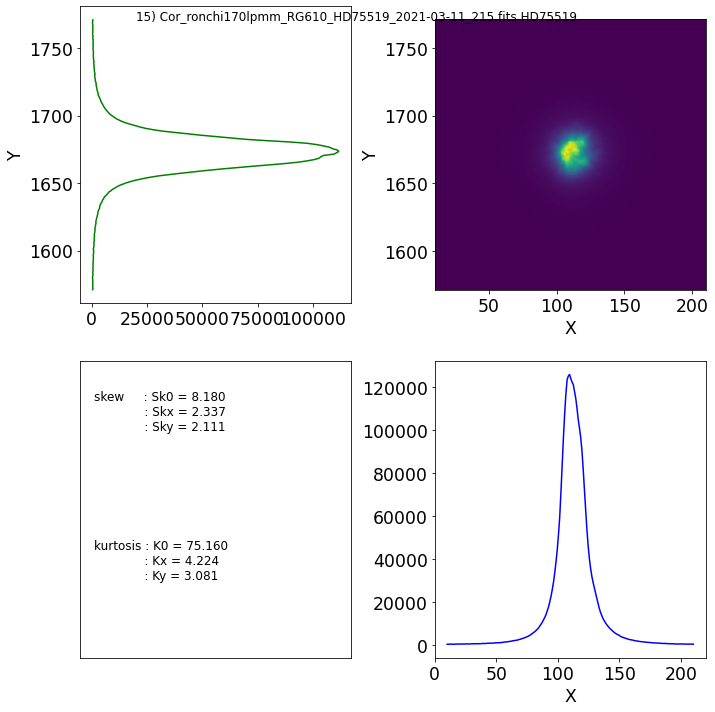

16) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_260.fits HD75519


2021-04-23 12:20:31  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.357411281555112 but average of self.read_out_noise is 8.5.


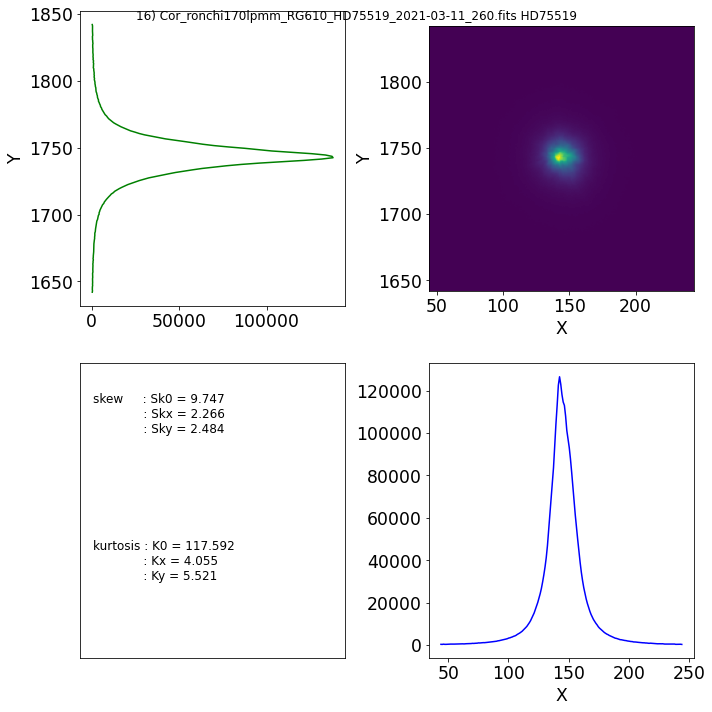

17) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_261.fits HD75519


2021-04-23 12:20:42  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.35739362006159 but average of self.read_out_noise is 8.5.


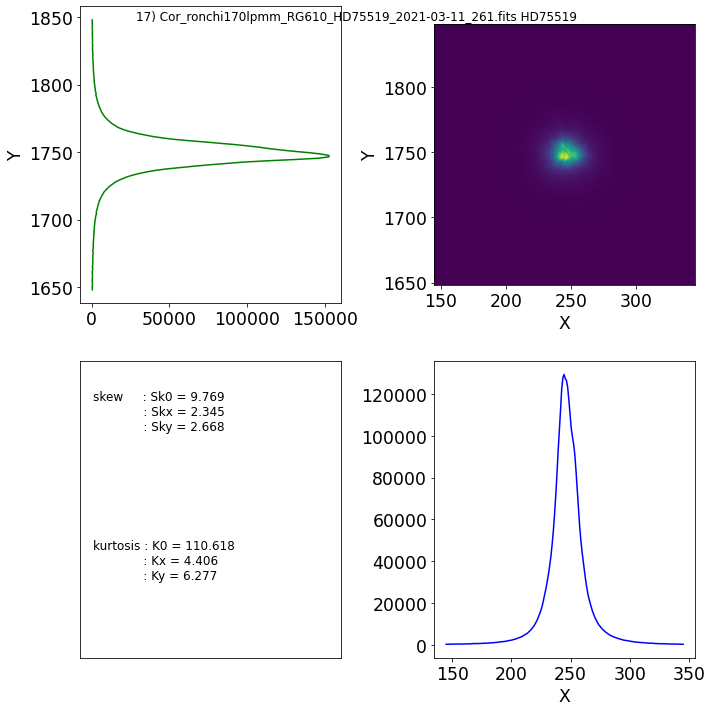

18) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_265.fits HD75519


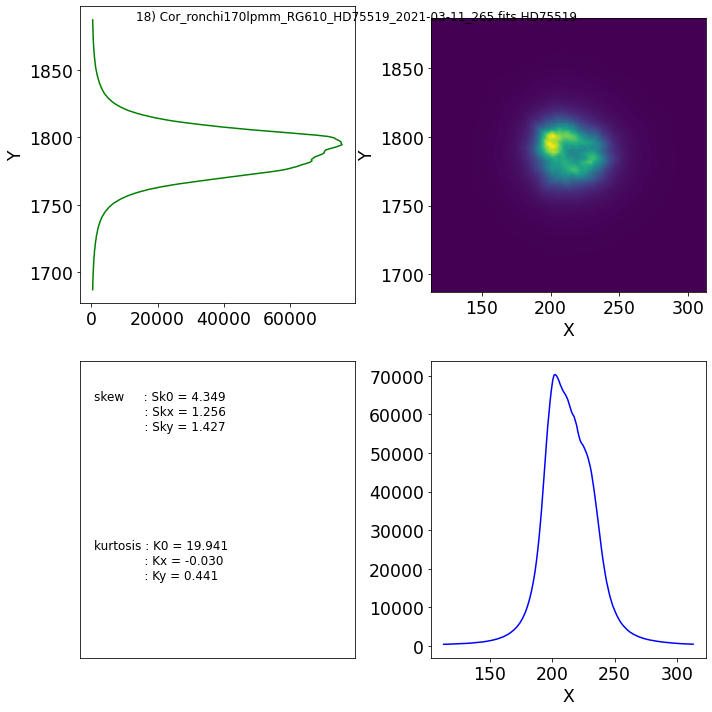

19) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_267.fits HD75519


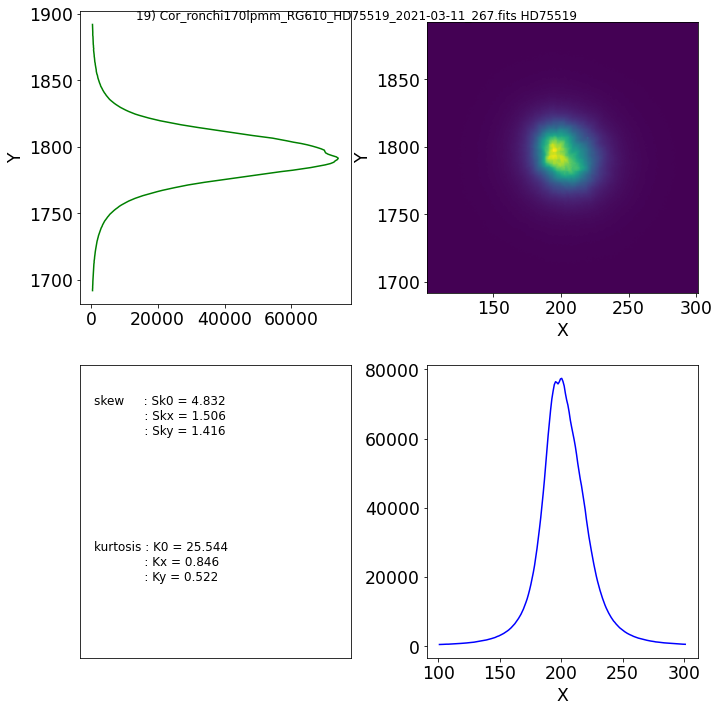

20) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_268.fits HD75519


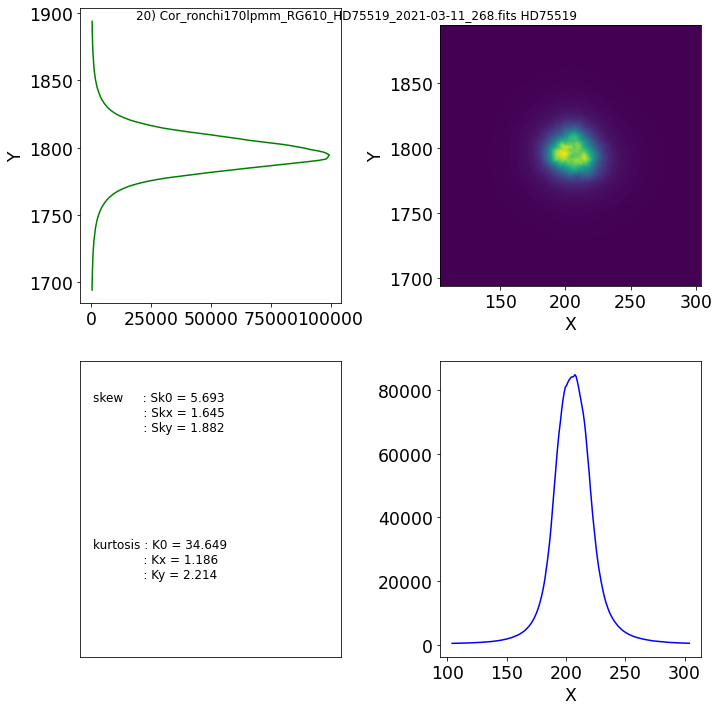

21) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_269.fits HD75519


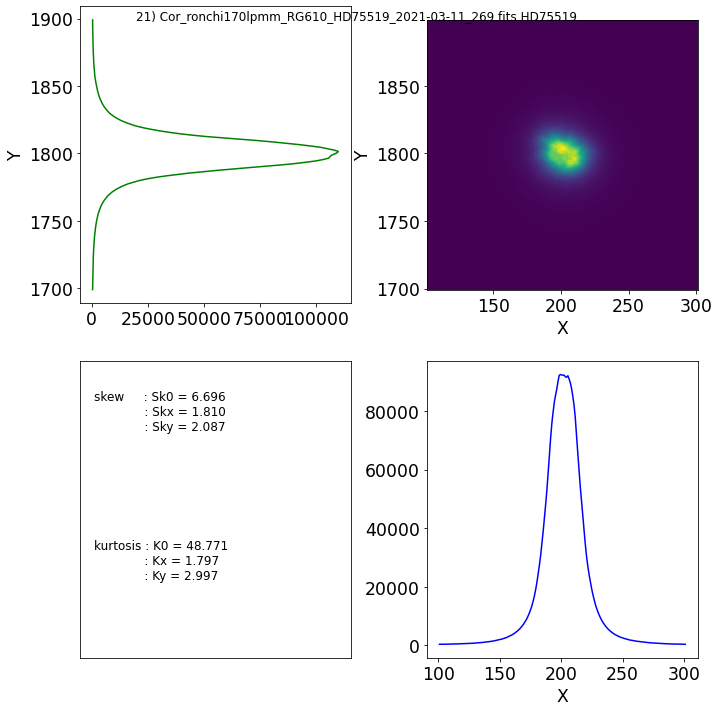

22) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_270.fits HD75519


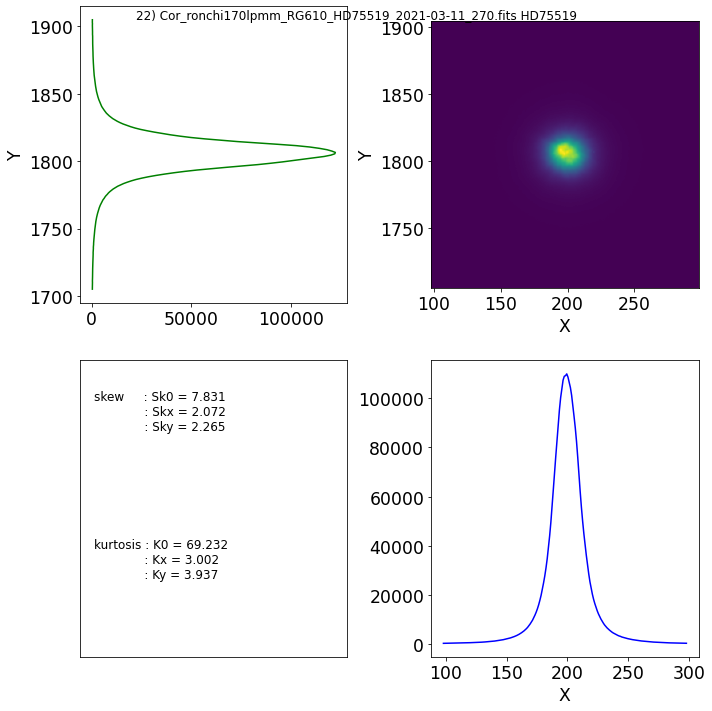

23) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_271.fits HD75519


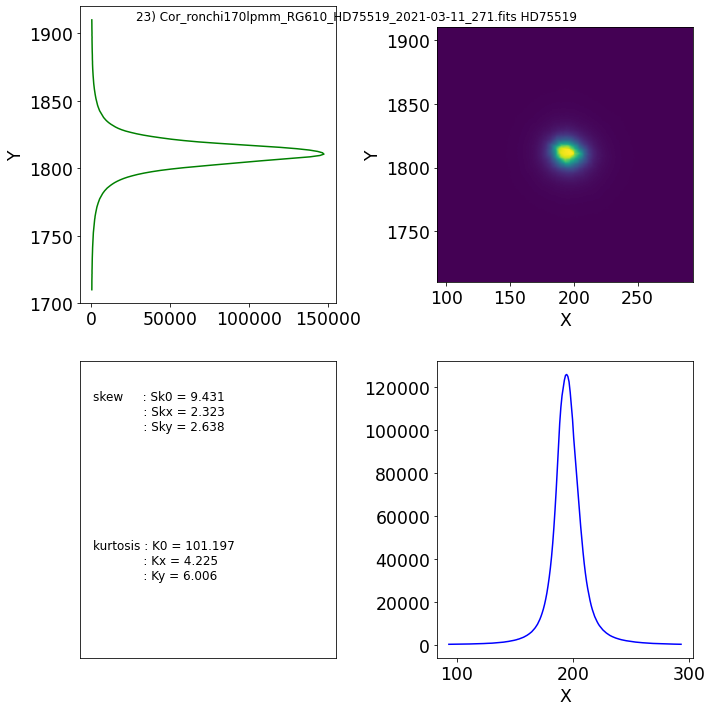

24) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_272.fits HD75519


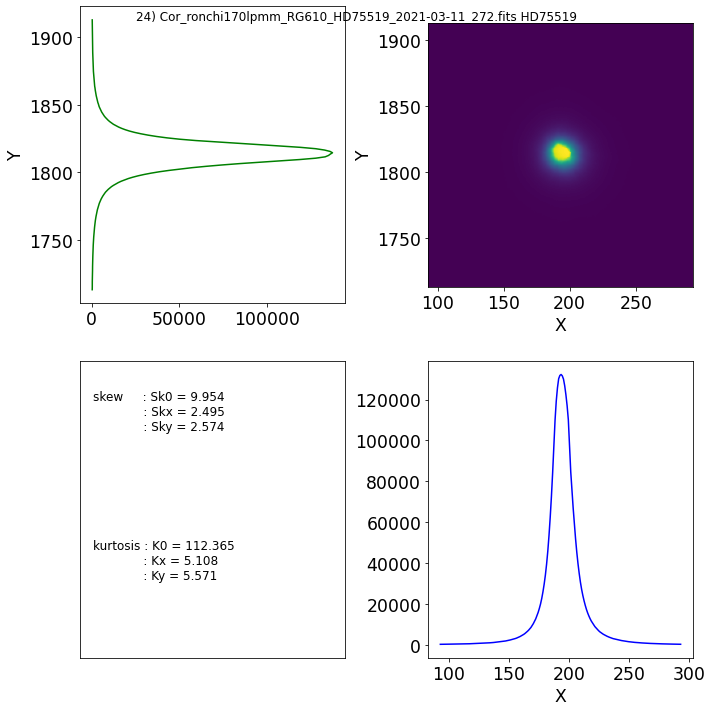

25) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_273.fits HD75519


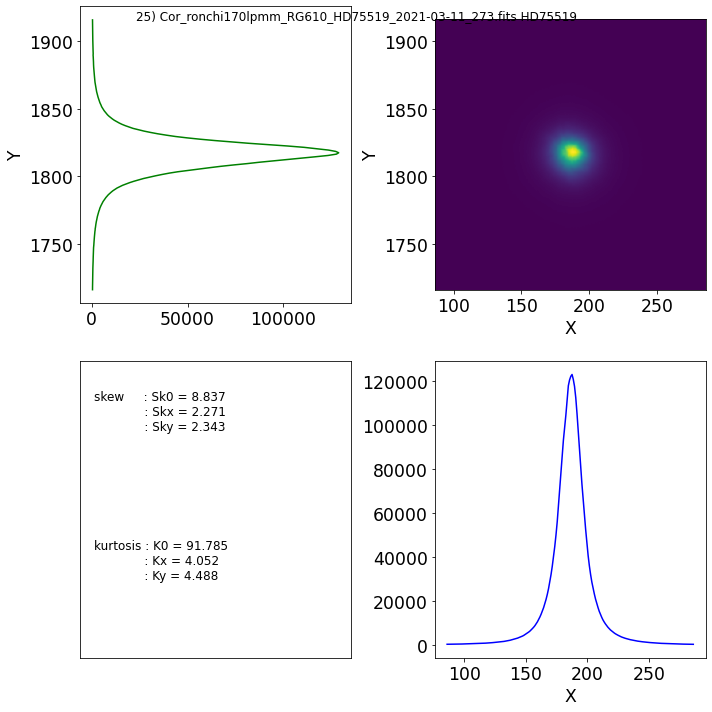

26) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_274.fits HD75519


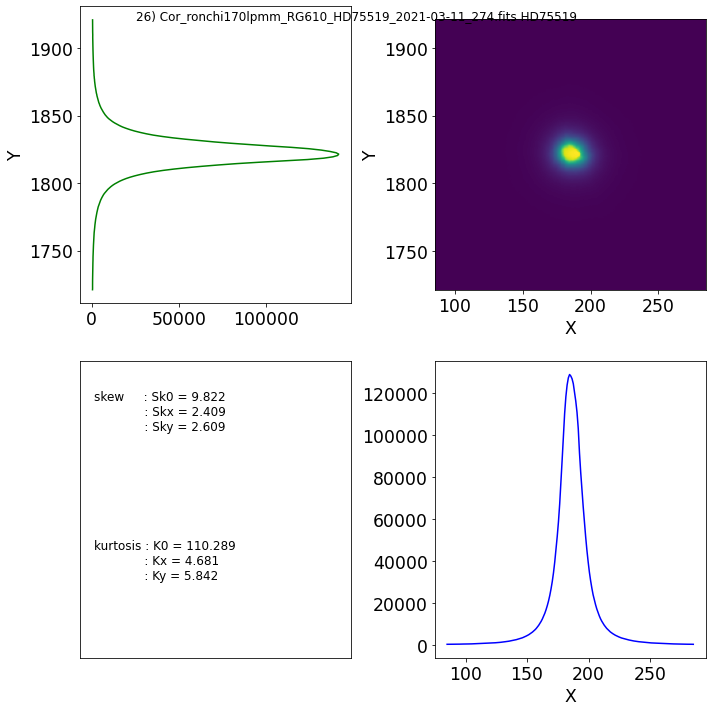

27) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_275.fits HD75519


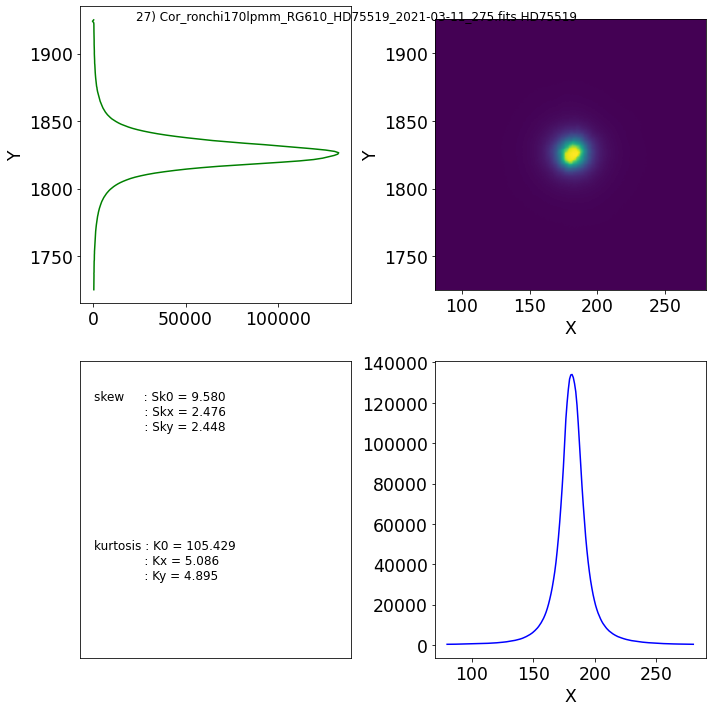

28) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_277.fits HD75519


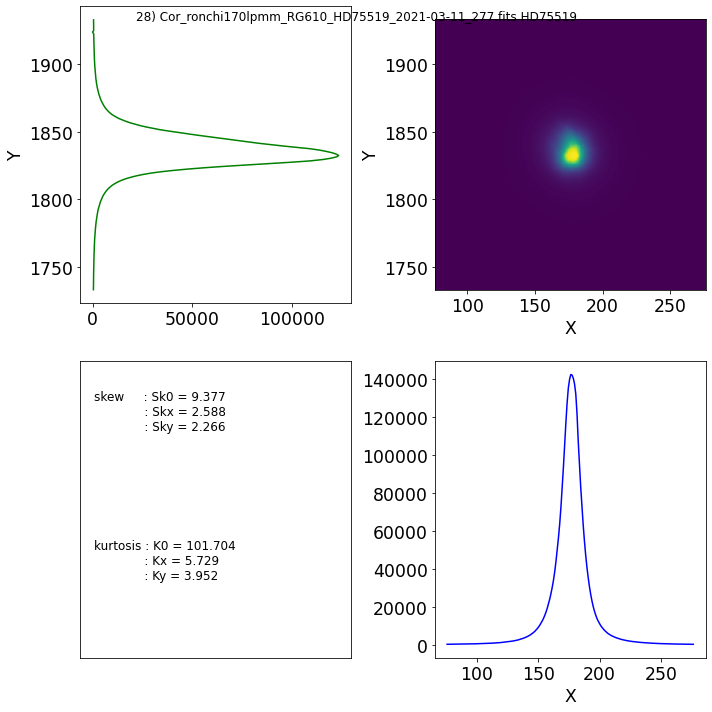

29) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_278.fits HD75519


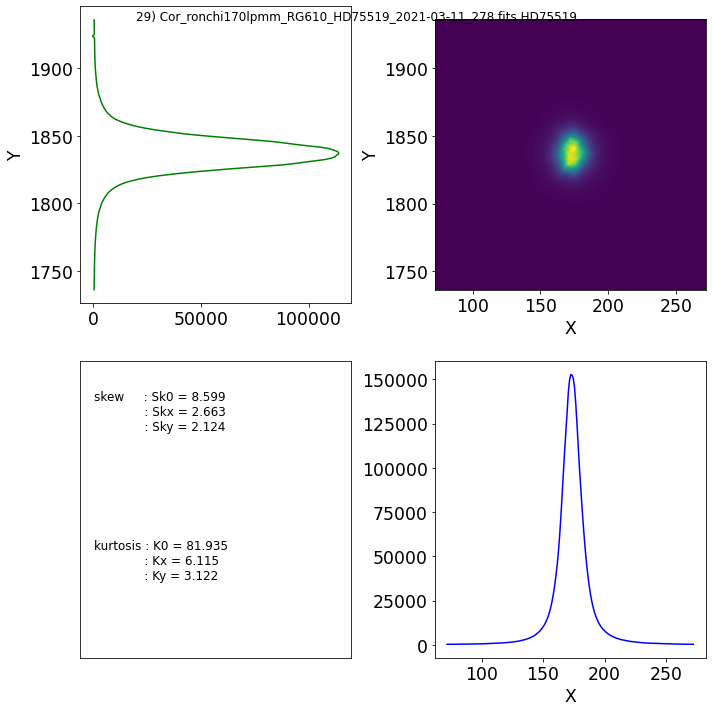

30) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_279.fits HD75519


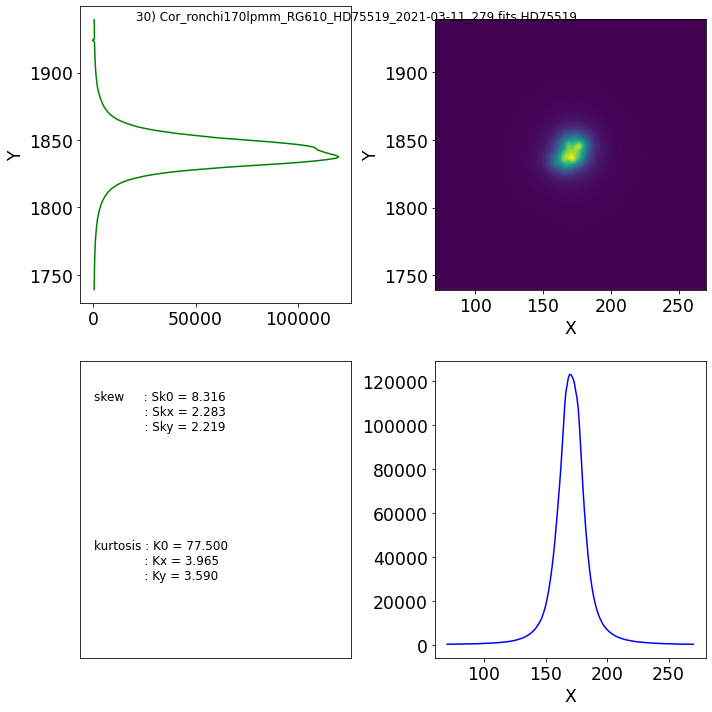

31) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_280.fits HD75519


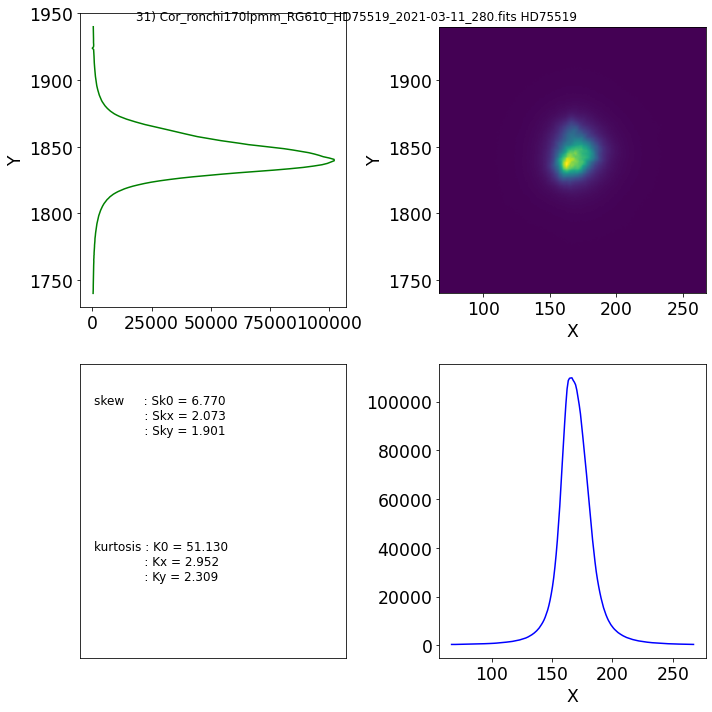

32) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_281.fits HD75519


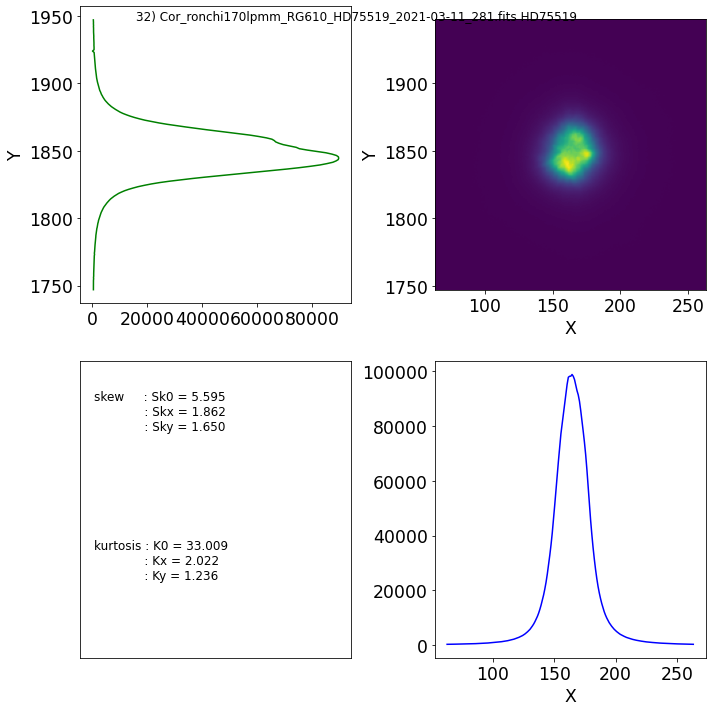

33) Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_282.fits HD75519


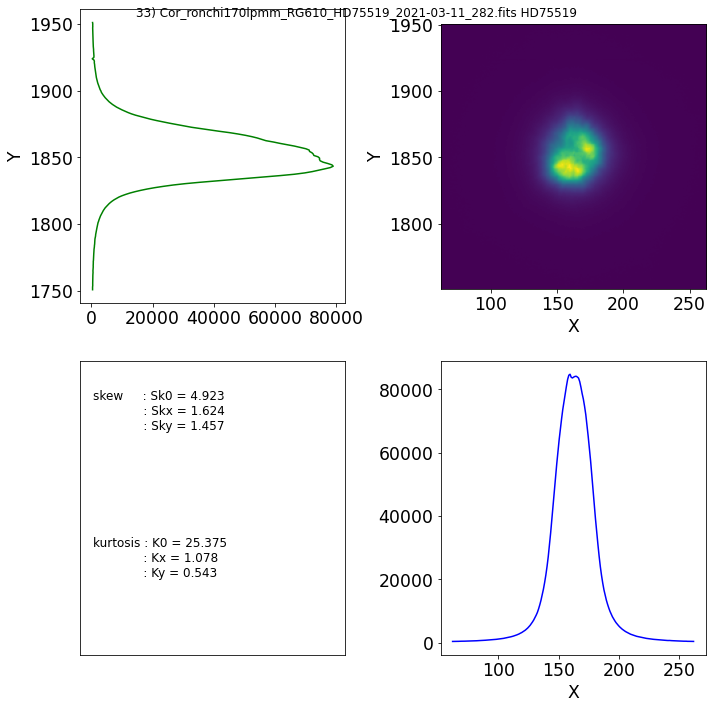

In [58]:
idx=0
for filename_image in df["file"]:
    
    
    try:
    
        fullfilename=os.path.join(dir_images,filename_image)
        X=df.iloc[idx]["Obj-posXpix"]
        Y=df.iloc[idx]["Obj-posYpix"]
        guess = [int(X),int(Y)]
        target = file_target(filename_image)[0]
    
        title=str(idx) + ") "+ filename_image + " " + target 
        print(title)
    

        image=Image(file_name=fullfilename, target_label=target, disperser_label=disperser_label, config=config)
        #image.plot_image(figsize=(12, 10),scale="log")
        parameters.VERBOSE = False
        parameters.DEBUG = False
        x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)
    
        if x1>100:
            WID=100
        else:
            WID=50
    

        thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
        thumbnail_y=thumbnail.sum(axis=1)
        thumbnail_x=thumbnail.sum(axis=0)
        xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
        yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
        k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
        kx=kurtosis(thumbnail_x,bias=True,fisher=True)
        ky=kurtosis(thumbnail_y,bias=True,fisher=True)
        s0=skew(thumbnail,axis=None,bias=True)
        sx=skew(thumbnail_x,bias=True)
        sy=skew(thumbnail_y,bias=True)
        
    
        shape_str='\n'.join((
            r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
            r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))
    
        skew_str='\n'.join((
            r'skew     : Sk0 = {:3.3f}'.format(s0),
            r'             : Skx = {:3.3f}'.format(sx),
            r'             : Sky = {:3.3f}'.format(sy)))
    
    
        kurt_str='\n'.join((
            r'kurtosis : K0 = {:3.3f}'.format(k0),
            r'             : Kx = {:3.3f}'.format(kx),
            r'             : Ky = {:3.3f}'.format(ky)))
    
        props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)
    
        fig=plt.figure(figsize=(10,10))
        fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

        ax=fig.add_subplot(222)
        ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

        ax=fig.add_subplot(221)
        base = plt.gca().transData
        rot = transforms.Affine2D().rotate_deg(-90)
        #ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
        ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
        ax.set_ylabel("Y")

        ax=fig.add_subplot(224)
        ax.plot(xx,thumbnail_x,"b")
        ax.set_xlabel("X")
        plt.tight_layout()

        ax=fig.add_subplot(223)
        ax.set_xlim(0,10)
        ax.set_ylim(0,10)
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.text(0.05, 0.95, shape_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        ax.text(0.05, 0.4, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        plt.suptitle(title)
        plt.show()
        
    except:
        msg=">>>FAILED : "+str(idx) + ") "+ filename_image + " " + target 
        print(msg)
        continue
        
        
        
        
        
    idx+=1